# Exercise 5: Logistic Regression

## Rahul Singh

### Task - Apply logistic regression to predict if an adult makes over 50K a year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv("adult.data", delimiter=",",
header=None,names=["age", "workclass", "fnlwgt", "education",
"education-num","marital-status", "occupation", "relationship",
"race","sex", "capital-gain", "capital-loss", "hours-per-week",
"native-country", "income"])

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [5]:
data.shape

(32561, 15)

In [6]:
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

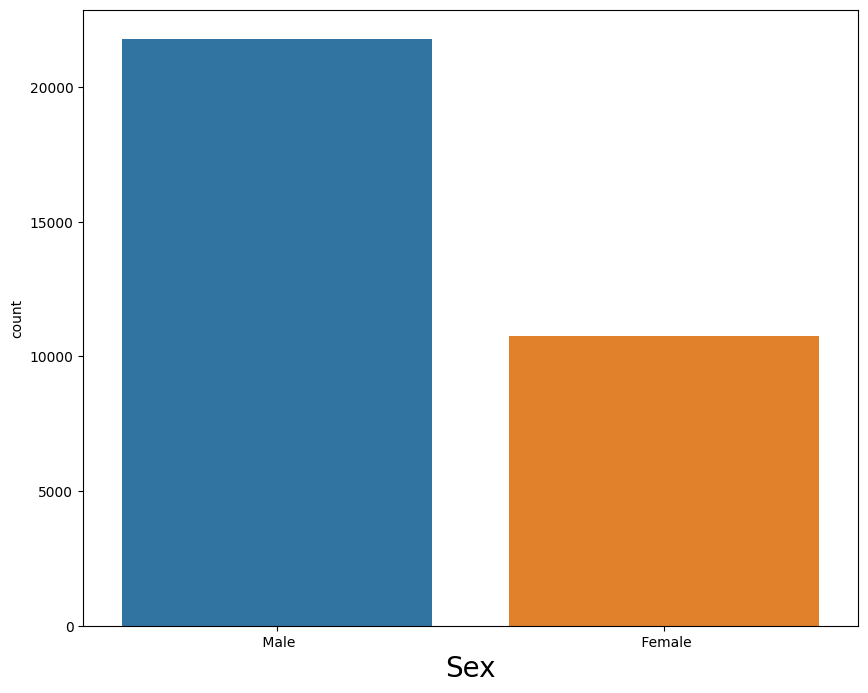

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(data,x='sex')
plt.xlabel('Sex',fontsize=20)

plt.show()

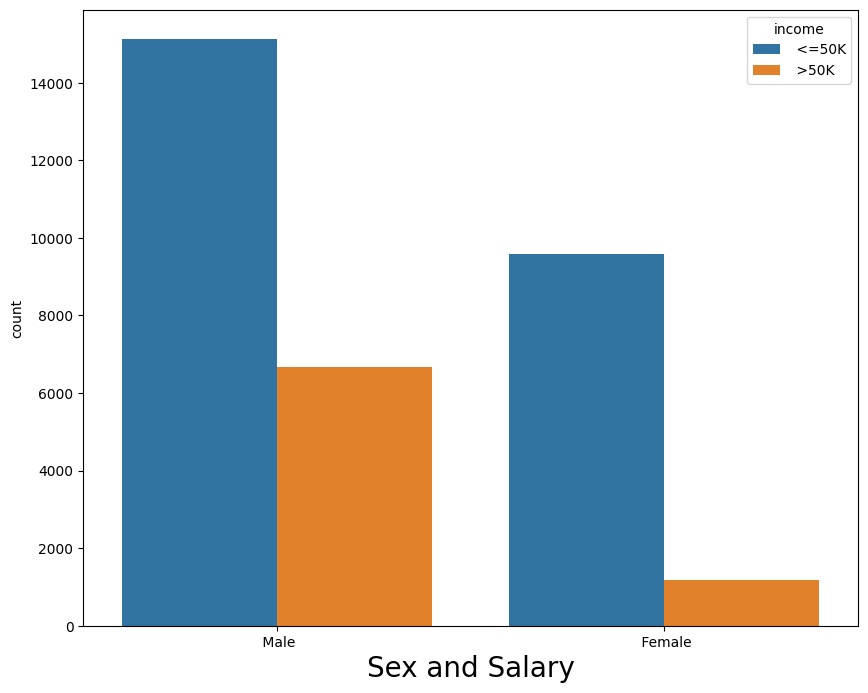

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(data,x='sex',hue='income')
plt.xlabel('Sex and Salary',fontsize=20)

plt.show()

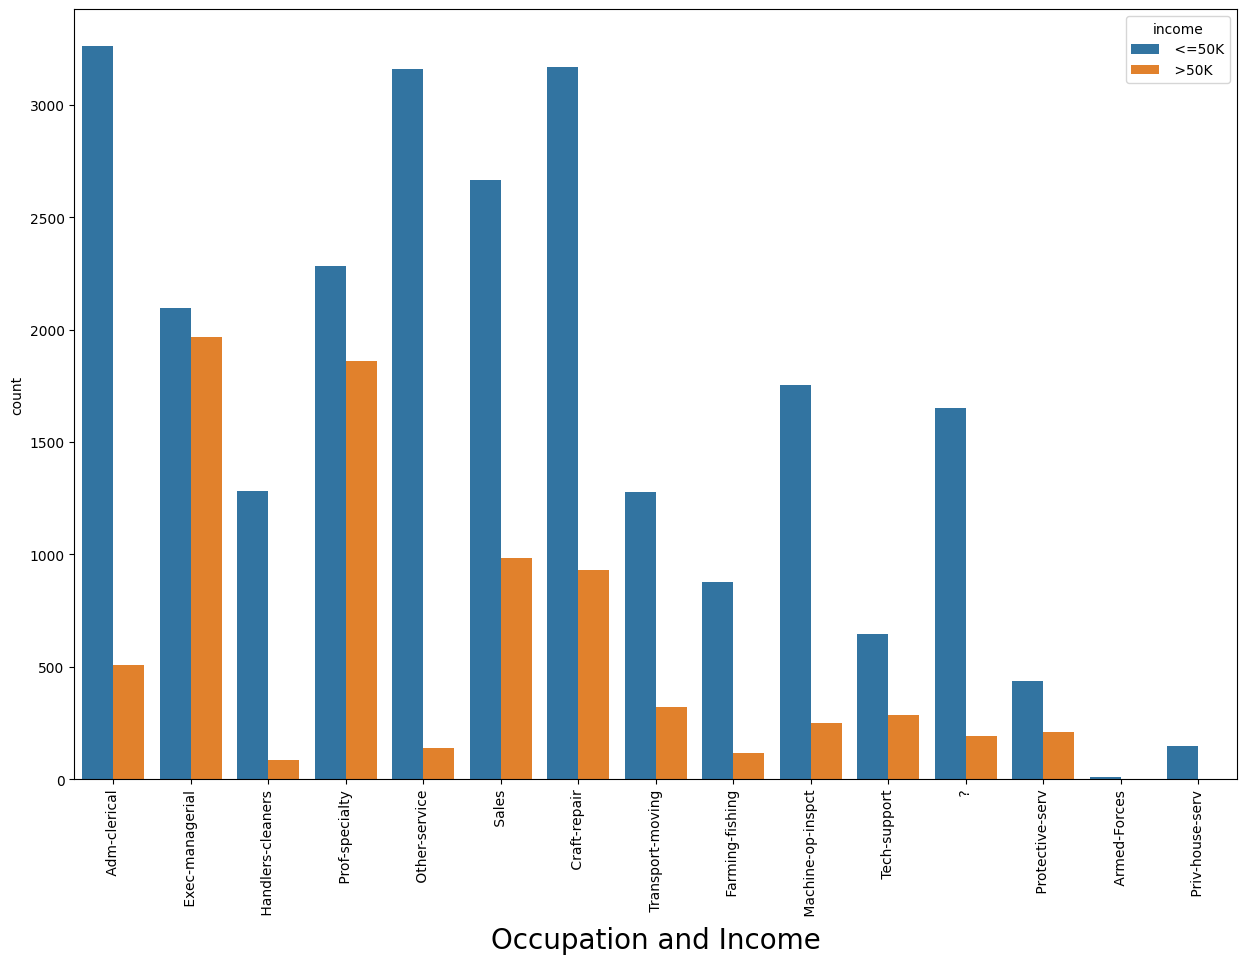

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(data,x='occupation',hue='income')
plt.xlabel('Occupation and Income',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

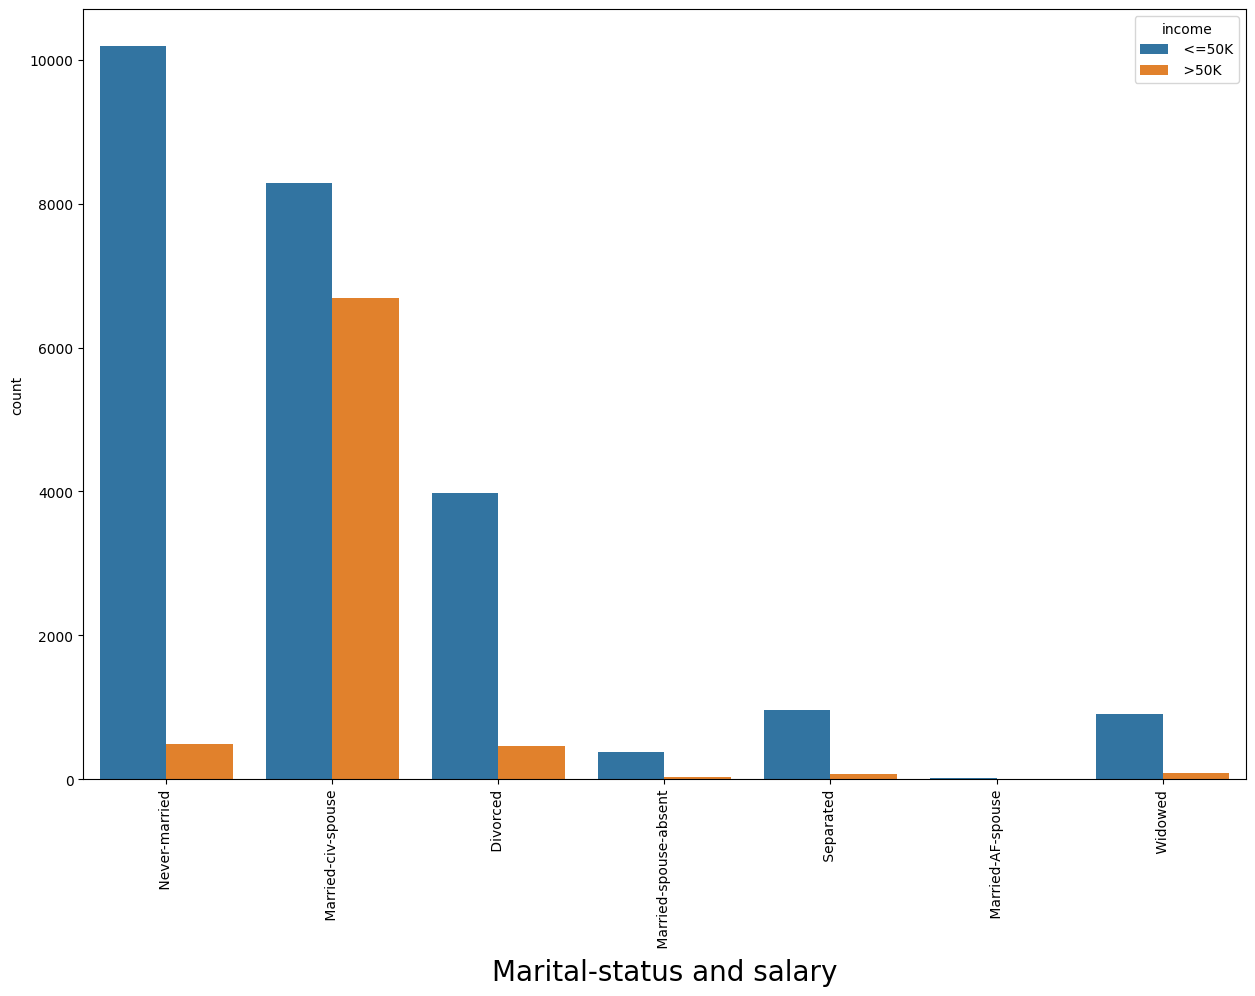

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(data,x='marital-status',hue='income')
plt.xlabel('Marital-status and salary',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

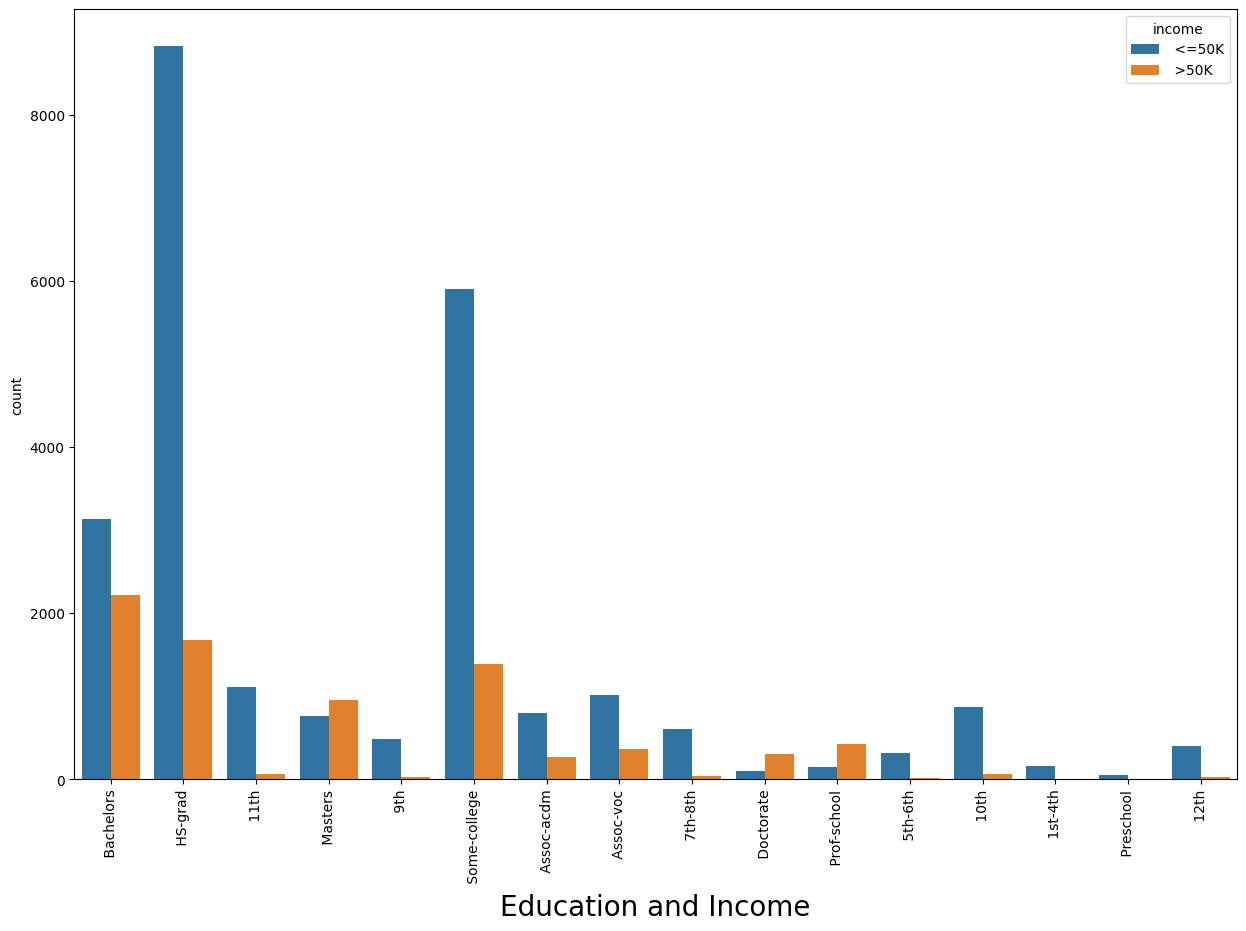

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(data,x='education',hue='income')
plt.xlabel('Education and Income',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

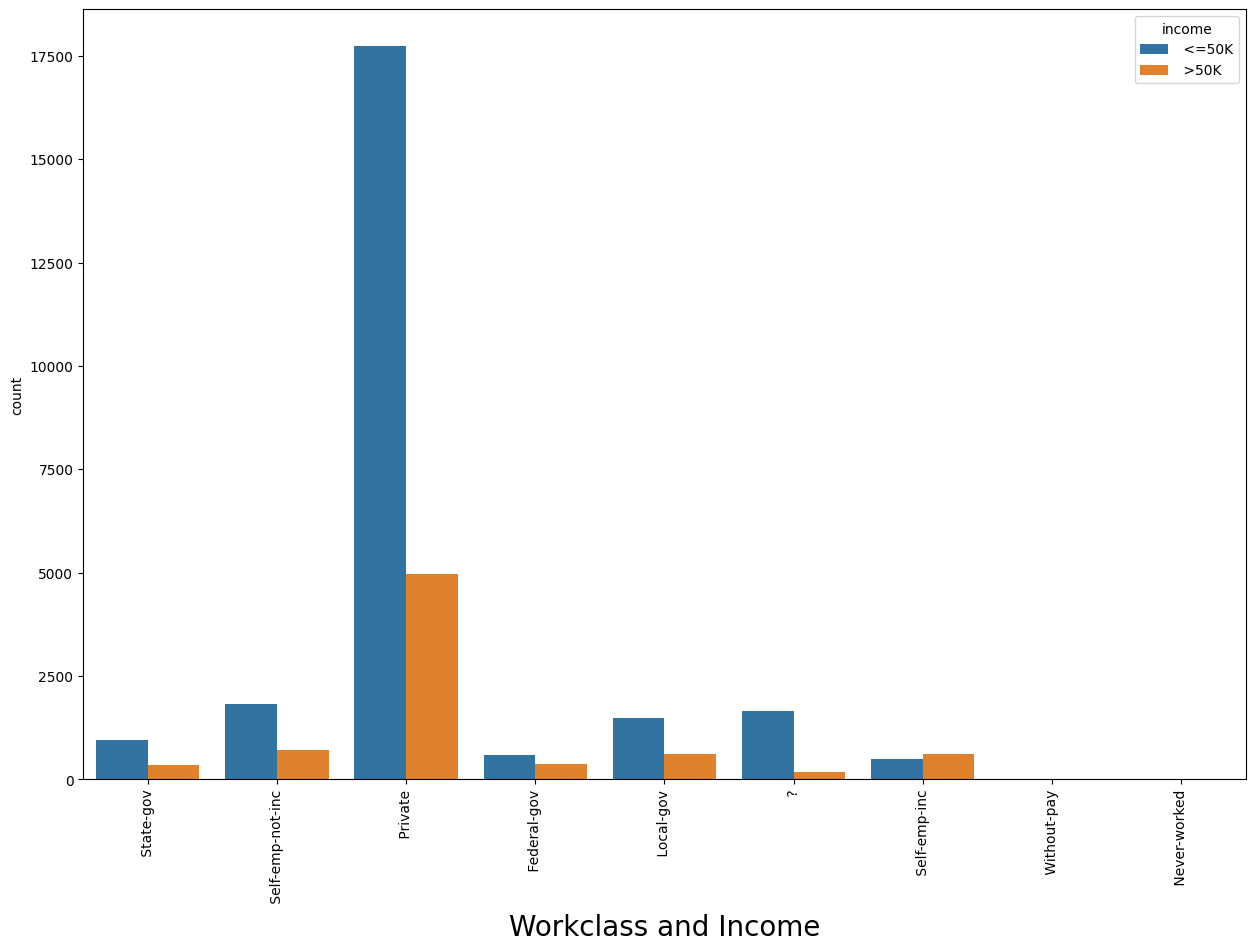

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(data,x='workclass',hue='income')
plt.xlabel('Workclass and Income',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
le = LabelEncoder()

In [14]:
data["workclass"] = le.fit_transform(data["workclass"])
data["education"] = le.fit_transform(data["education"])
data["marital-status"] = le.fit_transform(data["marital-status"])
data["occupation"] = le.fit_transform(data["occupation"])
data["relationship"] = le.fit_transform(data["relationship"])
data["race"] = le.fit_transform(data["race"])
data["sex"] = le.fit_transform(data["sex"])
data["native-country"] = le.fit_transform(data["native-country"])


In [15]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


In [16]:
data['income'] = le.fit_transform(data['income'])

In [17]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
32560,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


In [18]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [19]:
data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [20]:
X = data.drop(['income'], axis=1).to_numpy()
y = data['income'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
type(y)

numpy.ndarray

In [22]:
model = LogisticRegression(max_iter=3000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [23]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7894979272224781


## Q.2 - Plot a graph describing the effect of varying % of data in train_test_split phase. Plot train % vs accuracy.

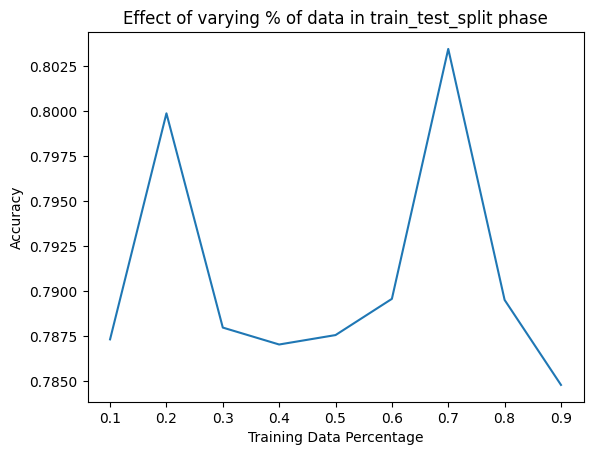

In [24]:
acc_list = []
train_size_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Iterate over different train sizes and calculate accuracy
for train_size in train_size_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)
    acc_list.append(logreg.score(X_test, y_test))

# Plot accuracy vs training data percentage
plt.plot(train_size_list, acc_list)
plt.xlabel("Training Data Percentage")
plt.ylabel("Accuracy")
plt.title("Effect of varying % of data in train_test_split phase")
plt.show()

# Thank You